In [25]:
#Image Morphology 
#Erosion

import numpy as np
def morph_erosion(img):
    h, w, c = img.shape

    # Create a numpy array to store the eroded image
    eroded_img = np.zeros((h, w, c), np.uint8)

    for row in range(1, h - 1):#0 to h - 1
        for col in range(1, w - 1):
            # Get the 3x3 neighborhood of the current pixel. There will be three 3x3 matrices - one for each channel
            neighborhood = img[row-1:row+2, col-1:col+2]

            # Find the minimum value for each channel in the neighborhood. Three min values will be output.
            min_values = np.min(neighborhood, axis=(0, 1))

            # Set the values of the current pixel in the eroded image to the minimum values
            eroded_img[row, col] = min_values
    return eroded_img

In [26]:
import cv2
import torch
import lpips

def LPIPs_score(img1_name,img2_name):

    img0=lpips.im2tensor(lpips.load_image(img1_name))
    img1=lpips.im2tensor(lpips.load_image(img2_name))

    loss_fn = lpips.LPIPS(net='vgg') #SquezeNet, spatial=true
    d = loss_fn.forward(img0, img1)
    print(d.item())

    return d.item()

In [27]:
#Pearson Correlation
def pearson_correlation(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_x_squared = sum([x_i ** 2 for x_i in x])
    sum_y_squared = sum([y_i ** 2 for y_i in y])
    sum_of_products = sum([x[i] * y[i] for i in range(n)])
    numerator = n * sum_of_products - sum_x * sum_y
    denominator = ((n * sum_x_squared - sum_x ** 2) * (n * sum_y_squared - sum_y ** 2)) ** 0.5
    return numerator / denominator

In [28]:
def mean_squared_error(img1, img2):
    # Ensure images have same dimensions
    assert img1.shape == img2.shape, "Images must have the same dimensions"
    
    img1 = img1.astype('float16')
    img2 = img2.astype('float16')

    mse = 0
    total_pixels = img1.shape[0] * img1.shape[1] * img1.shape[2]
    
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            for k in range(img1.shape[2]):
                mse += (img1[i, j, k] - img2[i, j, k]) ** 2
    mse /= total_pixels

    return mse

In [5]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import skimage
from skimage import metrics

PxlSub_list=[]
SSIM_list=[]
mse_list=[]
psnr_list=[]
LPIPS_list=[]
humanratings=[2.796,1.867,2.702,2.244,2.021,2.63,2.625,2.551,3.208,4.813,2.646,3.915,2.565]

for x in range(1,14):
    name1=f"{x}.png"
    name2=f'Standard_mask{x}.png'
    
    image1 = io.imread(name1)
    image2 = io.imread(name2)
    
#Image Compasison Techniques:
    
    SSIM=skimage.metrics.structural_similarity(image1, image2, multichannel=True)
    SSIM_list.append(SSIM)
    
    mse = mean_squared_error(image1, image2)
    mse_list.append(mse)
    
    PxlSub = 5-(np.log10(np.sqrt(mse)*100000))
    PxlSub_list.append(PxlSub)
    
    psnr=10*np.log10((255 ** 2)/mse)
    psnr_list.append(psnr)
    
    LPIPSscore=LPIPs_score(name1,name2)
    LPIPS_list.append(LPIPSscore)
    
#Displaying Image Difference
    
    image1=np.asarray(image1,np.int16)
    image2=np.asarray(image2,np.int16)

    diffmap=np.abs(np.subtract(image1,image2)).mean(axis=2)
    diffmap=np.asarray(diffmap,np.uint8)

    difference_image = np.abs(image1 - image2)


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\user\anaconda3\lib\site-packages\lpips\weights\v0.1\vgg.pth
0.02643613889813423
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\user\anaconda3\lib\site-packages\lpips\weights\v0.1\vgg.pth
0.025859517976641655
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\user\anaconda3\lib\site-packages\lpips\weights\v0.1\vgg.pth
0.025416379794478416
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\user\anaconda3\lib\site-packages\lpips\weights\v0.1\vgg.pth
0.03046513721346855
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\Users\user\anaconda3\lib\site-packages\lpips\weights\v0.1\vgg.pth
0.03142934292554855
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: C:\User

In [22]:
#Calculating the Root mean sqaure
rmse_list=[]
for mse in mse_list:
    rmse_list.append(np.sqrt(mse))

NameError: name 'mse_list' is not defined

C:\Users\user\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


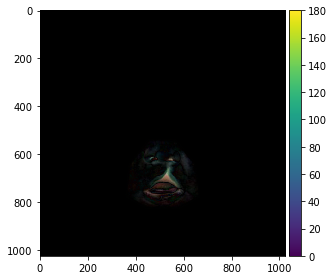

In [4]:
from skimage import io

image1 = io.imread("1.png")
image2 = io.imread("Standard_mask1.png")

image1=np.asarray(image1,np.int16)
image2=np.asarray(image2,np.int16)

difference_image = np.abs(image1 - image2)
io.imshow(difference_image)


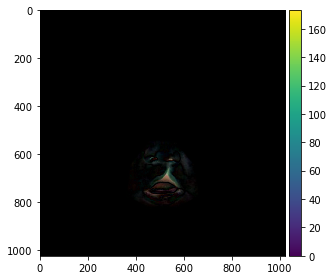

In [7]:
eroded_img= morph_erosion(difference_image)

io.imshow(eroded_img)


In [9]:
img1=(eroded_img**2)

mse = 0
total_pixels = img1.shape[0] * img1.shape[1] * img1.shape[2]

for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        for k in range(img1.shape[2]):
            mse += img1[i, j, k]
mse /= total_pixels


In [10]:
print(mse)

3.311793009440104


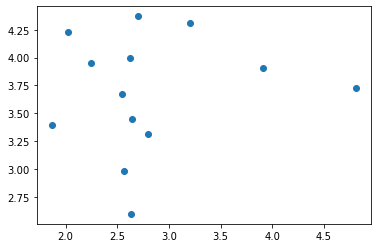

In [21]:
from matplotlib import pyplot as plt

#Eroding difference image before calculating the ms:

humanratings=[2.796,1.867,2.702,2.244,2.021,2.63,2.625,2.551,3.208,4.813,2.646,3.915,2.565]
mse_list_test=[]

for x in range(1,14):
    name1=f"{x}.png"
    name2=f'Standard_mask{x}.png'
    
    image1 = io.imread(name1)
    image2 = io.imread(name2)
    
    image1=np.asarray(image1,np.int16)
    image2=np.asarray(image2,np.int16)

    difference_image = np.abs(image1 - image2)
    eroded_img= morph_erosion(difference_image)

    img1=(eroded_img**2)

    mse = 0
    total_pixels = img1.shape[0] * img1.shape[1] * img1.shape[2]

    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            for k in range(img1.shape[2]):
                mse += img1[i, j, k]
                
    mse /= total_pixels
    mse_list_test.append(mse)

plt.scatter(humanratings, mse_list_test)


NameError: name 'rmse_list' is not defined

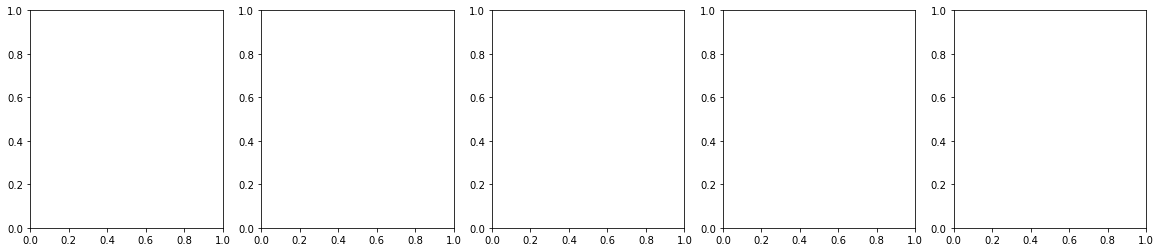

In [16]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
labels = ['RMSE', 'Pixelwise Subtraction Rating', 'SSIM', 'PSNR', 'LPIPS Score']
lists = [rmse_list, PxlSub_list, SSIM_list, psnr_list, LPIPS_list]

# Pearson Correlation Coefficient 
pcorr_list=[]
for i in lists:
    k=pearson_correlation(humanratings, i)
    pcorr_list.append(k)

pcorr_list = [round(num, 2) for num in pcorr_list]

for i, label, lst, corr in zip(range(5), labels, lists, pcorr_list):
    axs[i].plot(humanratings, lst, 'ro')
    axs[i].set_title("{} vs Human Rating ({})".format(label,corr))
    axs[i].set_xlabel('Human Rating')
    axs[i].set_ylabel(label)

plt.tight_layout()
plt.show()

NameError: name 'diffmap' is not defined

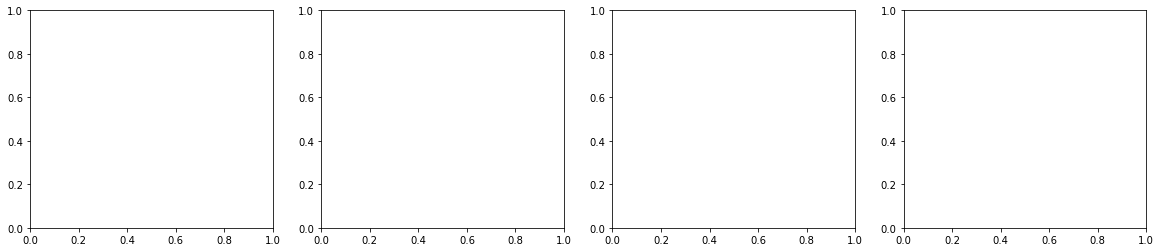

In [24]:
axs = plt.subplots(1, 4, figsize=(20,4))
labels = ['Cleft Image', 'Normalized Image', 'Difference Image', 'Difference Heatmap']
lists = [image1, image2, difference_image, diffmap]

# Iterate through the images and display them with their labels
for i, img in enumerate(lists):
    axs[1][i].imshow(img)
    axs[1][i].set_title(labels[i])

# Show the plot
#plt.tight_layout()
#plt.show()

plt.savefig(f"Set_{x}.png")


In [6]:
Cleft_image= cv2.imread("1.png")
normalised_img = cv2.imread("Standard_mask1.png")

# Perform morphological erosion on the color image
eroded_img = morph_erosion(normalised_img)

cv2.imshow('Cleft Image', Cleft_image)
cv2.imshow('Normalised Image from Stable Diffusion', normalised_img)
cv2.imshow('Eroded Image', eroded_img)
cv2.waitKey(0)


-1

In [56]:
#morphological erosion is usually done on gray scale images?
#shouldnt the erosion be done on the difference image? yes, 3 times
#Should we try results from other inpainting algorithms?
#how to convert 3 grayscale channels to one color image

#hsv
#thresholding
#lpips heat maps

In [ ]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import skimage
from skimage import metrics

PxlSub_list=[]
mse_list=[]
humanratings=[2.796,1.867,2.702,2.244,2.021,2.63,2.625,2.551,3.208,4.813,2.646,3.915,2.565]

for x in range(1,14):
    name1=f"{x}.png"
    name2=f'Standard_mask{x}.png'
    
    image1 = io.imread(name1)
    image2 = io.imread(name2)
    
    #using the image that has undergone morphological erosion
    image2=morph_erosion(image2)
    
#Image Compasison Techniques:
   
    mse = mean_squared_error(image1, image2)
    mse_list.append(mse)
    
    PxlSub = 5-(np.log10(np.sqrt(mse)*1000))
    PxlSub_list.append(PxlSub)

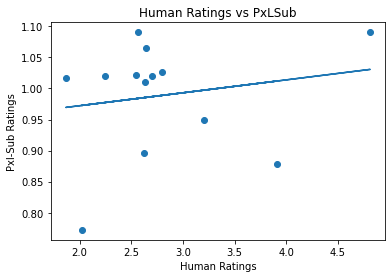

In [87]:
humanratings = np.array(humanratings)
PxlSub_list = np.array(PxlSub_list)

a, b = np.polyfit(humanratings,PxlSub_list, 1)
plt.scatter(humanratings, PxlSub_list)

#add line of best fit to plot
plt.plot(humanratings, a*humanratings+b)

plt.ylabel("Pxl-Sub Ratings")
plt.xlabel("Human Ratings")
plt.title("Human Ratings vs PxLSub")

plt.show()
